In [51]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
plt.rc("font",family = "Malgun Gothic")
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}

In [14]:
retail = pd.read_csv('./오아로주문내역_8월부터2월까지_202006110934.csv', encoding='cp949')
retail['주문 완료 일시'] = pd.to_datetime(retail['주문 완료 일시'], infer_datetime_format=True)

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   주문번호           1640 non-null   object        
 1   주문상세순번         1640 non-null   int64         
 2   사이트 명          1640 non-null   object        
 3   주문 매체          1640 non-null   object        
 4   주문상세상태         1640 non-null   object        
 5   클레임 상세 유형      0 non-null      float64       
 6   주문 접수 일시       1640 non-null   object        
 7   주문 완료 일시       1640 non-null   datetime64[ns]
 8   회원 번호          1629 non-null   float64       
 9   아이디            1629 non-null   object        
 10  주문자 명          1639 non-null   object        
 11  주문자 휴대폰        1639 non-null   object        
 12  브랜드 명          1640 non-null   object        
 13  상위 협력사 명       0 non-null      float64       
 14  상위 협력사 번호      0 non-null      float64       
 15  협력사 명          1640 n

#### 우수 고객 확인
 - 구매 횟수 기준
 - 지불 금액 기준

In [15]:
retail.groupby('회원 번호').count()['잔여주문수량'].sort_values(ascending=False)

회원 번호
7399.0     58
5317.0     58
5088.0     57
11407.0    54
5166.0     53
           ..
12048.0     1
11128.0     1
11055.0     1
9856.0      1
3473.0      1
Name: 잔여주문수량, Length: 323, dtype: int64

In [16]:
retail.groupby('회원 번호').sum()['주문금액'].sort_values(ascending=False)

회원 번호
7399.0     9762970
5088.0     7420840
5317.0     7320740
5166.0     7038515
5309.0     5925990
            ...   
13541.0      48400
3677.0       48100
13022.0      45580
15638.0      40260
25673.0      39650
Name: 주문금액, Length: 323, dtype: int64

#### 사용자 retention 분석
 - 월간 사용자 cohort를 바탕으로 월별 재구매율(retention) 분석하기
 - heatmap으로 한눈에 재구매율을 파악 가능


#### 사용자 기준으로 최초 구매한 월(month) 연산하기
 - Month : 구매월(일(day)을 무시) 
 - MonthStarted: 사용자가 최초 구매한 달

In [18]:
def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1)

retail['주문월'] = retail['주문 완료 일시'].apply(get_month_as_datetime)

retail.head()

,주문번호,주문상세순번,사이트 명,주문 매체,주문상세상태,클레임 상세 유형,주문 접수 일시,주문 완료 일시,회원 번호,아이디,...,부분환불금액,배송방법,실배송금액,주문중량,지정일배송일자,수령인,수령인 휴대폰,수령인 주소 1,수령인 주소 2,주문월
0,C20191114036410,1,B2B,MOBILE,구매확정,NaN,2019-11-14 20:23:28,2019-11-14 20:23:28,NaN,NaN,...,NaN,택배,0,11,NaN,NaN,NaN,NaN,NaN,2019-11-01
1,C20191225043028,2,B2B,MOBILE,구매확정,NaN,2019-12-25 20:29:22,2019-12-25 20:29:22,16728.0,jisung***@naver.com,...,NaN,택배,0,9,2019-12-26 00:00:00,이**,010-****-****,강원 춘천시 ******길 11,1층,2019-12-01
2,C20200101044026,1,B2B,MOBILE,구매확정,NaN,2020-01-01 01:15:18,2020-01-01 01:15:18,5317.0,fightin***@naver.com,...,NaN,택배,0,10,2020-01-02 00:00:00,이**,010-****-****,서울 송파구 *******길 9,1층 이정돈,2020-01-01
3,C20200101044032,2,B2B,MOBILE,구매확정,NaN,2020-01-01 02:59:54,2020-01-01 02:59:54,6868.0,jaehy***@naver.com,...,NaN,콜드체인,0,9,2020-01-01 00:00:00,오**,010-****-****,울산 남구 ******길 4,오대포소금구이,2020-01-01
4,C20200101044032,1,B2B,MOBILE,구매확정,NaN,2020-01-01 02:59:54,2020-01-01 02:59:54,6868.0,jaehy***@naver.com,...,NaN,콜드체인,0,9,2020-01-01 00:00:00,오**,010-****-****,울산 남구 ******길 4,오대포소금구이,2020-01-01


In [19]:
month_group = retail.groupby('회원 번호')['주문 완료 일시']
retail['MonthStarted'] = month_group.transform(np.min)

retail.tail()

,주문번호,주문상세순번,사이트 명,주문 매체,주문상세상태,클레임 상세 유형,주문 접수 일시,주문 완료 일시,회원 번호,아이디,...,배송방법,실배송금액,주문중량,지정일배송일자,수령인,수령인 휴대폰,수령인 주소 1,수령인 주소 2,주문월,MonthStarted
1635,C20191231044014,1,B2B,MOBILE,구매확정,NaN,2019-12-31 21:54:58,2019-12-31 21:56:48,5086.0,altjs1***@naver.com,...,콜드체인,0,10,2020-01-01 00:00:00,강**,010-****-****,경북 김천시 **길 193,논두렁생고기전문점,2019-12-01,2019-10-01
1636,C20191231044015,2,B2B,MOBILE,구매확정,NaN,2019-12-31 22:03:48,2019-12-31 22:05:35,5086.0,altjs1***@naver.com,...,콜드체인,0,6,2020-01-01 00:00:00,강**,010-****-****,경북 김천시 **길 193,논두렁생고기전문점,2019-12-01,2019-10-01
1637,C20191231044015,1,B2B,MOBILE,구매확정,NaN,2019-12-31 22:03:48,2019-12-31 22:05:35,5086.0,altjs1***@naver.com,...,콜드체인,0,6,2020-01-01 00:00:00,강**,010-****-****,경북 김천시 **길 193,논두렁생고기전문점,2019-12-01,2019-10-01
1638,C20191231044022,1,B2B,PC,구매확정,NaN,2019-12-31 23:27:35,2019-12-31 23:27:35,6229.0,tamor***@naver.com,...,택배,0,7,2020-01-02 00:00:00,박**,010-****-****,전북 군산시 임피면 **로 368 동광금속,콩콩한우직판장,2019-12-01,2019-11-01
1639,C20191231044023,1,B2B,MOBILE,구매확정,NaN,2019-12-31 23:39:49,2019-12-31 23:39:49,5435.0,did8***@naver.com,...,콜드체인,0,9,2020-01-01 00:00:00,강**,010-****-****,대전 유성구 ********길 43 한국집,한국집숯불갈비,2019-12-01,2019-11-01


#### 기준이 되는 월과 실제 구매 월의 차이 계산하기
 - 각 구매가 최초 구매로 부터 얼마의 월이 지났는지 연산
 - MonthPassed : 최초 구매월로부터의 월 차이

In [21]:
retail['MonthPassed'] = (retail['주문월'].dt.year - retail['MonthStarted'].dt.year) * 12 + \
    (retail['주문월'].dt.month - retail['MonthStarted'].dt.month)

In [ ]:
retail.tail()

#### 기준 월, MonthPassed를 기준으로 고객 카운팅
 - 기준이 되는 월과 그 월로부터 지난 기간의 고객 수를 계산

In [22]:
def get_unique_no(x):
    return len(np.unique(x))

cohort_group = retail.groupby(['MonthStarted', 'MonthPassed'])
cohort_df = cohort_group['회원 번호'].apply(get_unique_no).reset_index()
cohort_df.head()

,MonthStarted,MonthPassed,회원 번호
0,2019-08-01,0.0,7
1,2019-08-01,1.0,2
2,2019-08-01,2.0,1
3,2019-08-01,3.0,2
4,2019-08-01,5.0,1


#### 테이블 피벗
 - pivot 함수를 이용하여 index는 MonthStarted, columns을 MonthPassed로 변경하여 테이블 변경
 - 첫번째 column을 기준으로 100분위 연산

In [23]:
cohort_df = cohort_df.pivot(index='MonthStarted', columns='MonthPassed')
cohort_df.head()

회원 번호                             
MonthPassed     0.0   1.0   2.0   3.0   4.0  5.0
MonthStarted                                    
2019-08-01      7.0   2.0   1.0   2.0   NaN  1.0
2019-09-01     22.0   6.0   6.0   4.0   4.0  1.0
2019-10-01     31.0  14.0  12.0  17.0  10.0  NaN
2019-11-01    118.0  35.0  31.0  23.0   NaN  NaN
2019-12-01     53.0  27.0  19.0   NaN   NaN  NaN

In [24]:
customer_cohort = cohort_df.div(cohort_df.iloc[:, 0], axis=0) * 100
customer_cohort = customer_cohort.round(decimals=2)

customer_cohort

회원 번호                                   
MonthPassed     0.0    1.0    2.0    3.0    4.0    5.0
MonthStarted                                          
2019-08-01    100.0  28.57  14.29  28.57    NaN  14.29
2019-09-01    100.0  27.27  27.27  18.18  18.18   4.55
2019-10-01    100.0  45.16  38.71  54.84  32.26    NaN
2019-11-01    100.0  29.66  26.27  19.49    NaN    NaN
2019-12-01    100.0  50.94  35.85    NaN    NaN    NaN
2020-01-01    100.0  16.92    NaN    NaN    NaN    NaN
2020-02-01    100.0    NaN    NaN    NaN    NaN    NaN

#### heatmap 출력하기
 - seaborn의 heatmap 함수로 visualization!

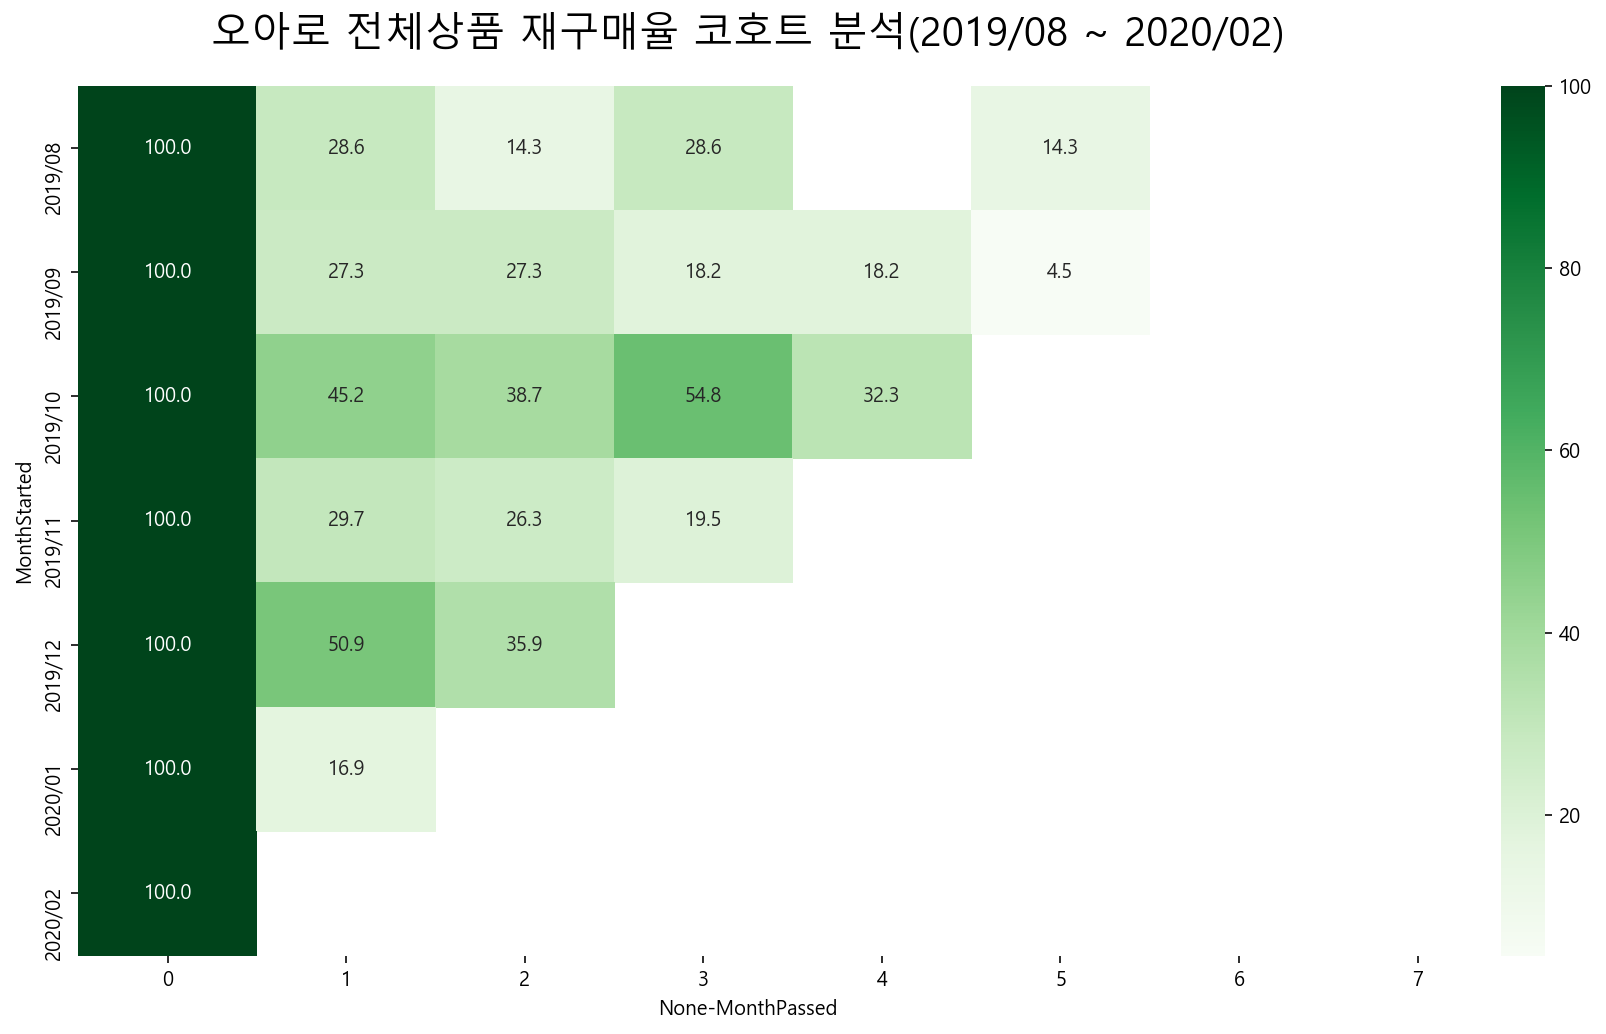

In [57]:
xticks = np.arange(0, 8)
yticks = ['2019/08','2019/09','2019/10','2019/11','2019/12','2020/01','2020/02']

plt.figure(figsize = (15, 8))
plt.title('오아로 전체상품 재구매율 코호트 분석(2019/08 ~ 2020/02)',fontsize=20,pad=20)
sns.heatmap(customer_cohort, 
            annot=True, 
            xticklabels=xticks,
            yticklabels=yticks, 
            fmt='.1f',cmap='Greens')
plt.savefig('오아로 전체상품 재구매율 코호트')